In [ ]:
# Importing required packages 
import pandas as pd
import matplotlib.pyplot as plt #(plotin histograms in cell #3)
import numpy as np
from scipy.stats import kde
from tabulate import tabulate
import scipy.stats as stats
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Defining some constants 
nbins=30

In [3]:
#Reading Data and printing head
energydata = pd.read_csv("./energydata_complete.csv")
#Creating subsamples
#Choosing 6 continous colomns, Appliance is the target variable
# 'lights' is a discrete variable and it is not used in the analysis, used only for the conditional variances.
sample_energydata=energydata[[ 'lights','T2', 'T4', 'T5',  'RH_7', 'RH_3', 'RH_out','Appliances']]
df_sample_colomn_energydata = pd.DataFrame(sample_energydata)

## Step 01 : Non-parametric estimation of PDF in form of histogram and using kernel density function 

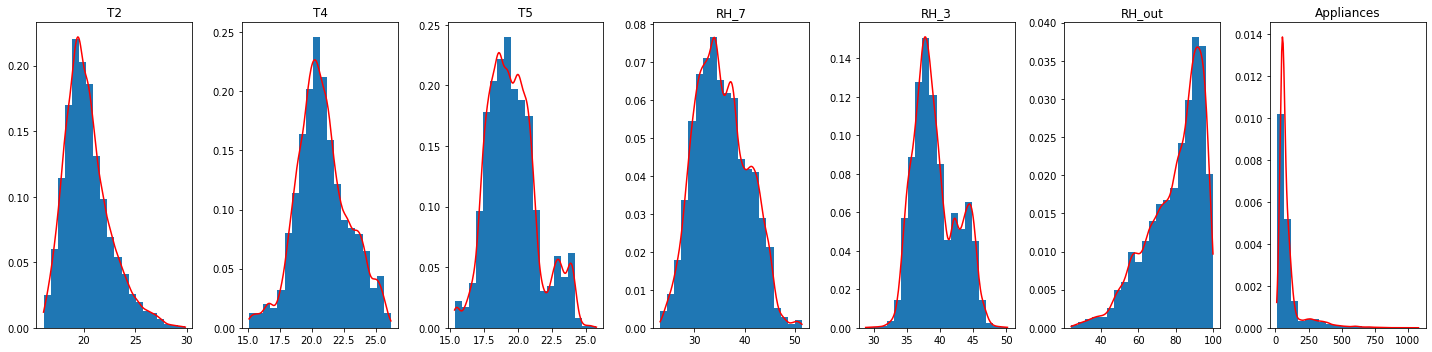

In [125]:
fig, axs = plt.subplots(len(df_sample_colomn_energydata.columns[1:])//7,7, figsize=(20, 5))
i=1
for ax in axs.ravel():
    col=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[i]].to_numpy()
    density = kde.gaussian_kde(col)
    xgrid = np.linspace(col.min(), col.max(), 200)
    ax.hist(col, bins=20,density=True, stacked=True)
    ax.plot(xgrid, density(xgrid), 'r-')
    ax.set_title(df_sample_colomn_energydata.columns[i])
    i+=1
plt.tight_layout()

## Step 02: Estimation of multivariate mathematical expectation and variance

In [126]:
# Mean, Expectation
df_sample_colomn_energydata[df_sample_colomn_energydata.columns[1:]].mean()

T2            20.341219
T4            20.855335
T5            19.592106
RH_7          35.388200
RH_3          39.242500
RH_out        79.750418
Appliances    97.694958
dtype: float64

In [127]:
# Variance
df_sample_colomn_energydata[df_sample_colomn_energydata.columns[1:]].var(ddof=1)

T2                4.809133
T4                4.173377
T5                3.402635
RH_7             26.155124
RH_3             10.592268
RH_out          222.042410
Appliances    10511.353180
dtype: float64

In [128]:
# Coverance
df_sample_colomn_energydata[df_sample_colomn_energydata.columns].cov()

,lights,T2,T4,T5,RH_7,RH_3,RH_out,Appliances
lights,62.979899,-0.097836,-0.143620,-1.152735,1.423334,3.387651,8.105521,160.512176
T2,-0.097836,4.809133,3.414049,2.914777,2.570685,0.867146,-16.511737,26.996601
T4,-0.143620,3.414049,4.173377,3.285300,0.454756,-0.933861,-11.829524,8.436711
T5,-1.152735,2.914777,3.285300,3.402635,1.404742,-0.300548,-7.530112,3.736981
RH_7,1.423334,2.570685,0.454756,1.404742,26.155124,13.859693,28.845903,-29.175191
RH_3,3.387651,0.867146,-0.933861,-0.300548,13.859693,10.592268,17.274146,12.109644
RH_out,8.105521,-16.511737,-11.829524,-7.530112,28.845903,17.274146,222.042410,-232.646723
Appliances,160.512176,26.996601,8.436711,3.736981,-29.175191,12.109644,-232.646723,10511.353180


## Step 03 : non-parametric estimation of conditional distributions, mathematical expectations and variances. 


### 03-01 Non-Parametric Estimation of conditional distributions

#### Non-Parametric Estimation of conditional distributions #1
Plot pairwise relationships in a dataset using kde method

Bivariate distributions using kernel density estimation.
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

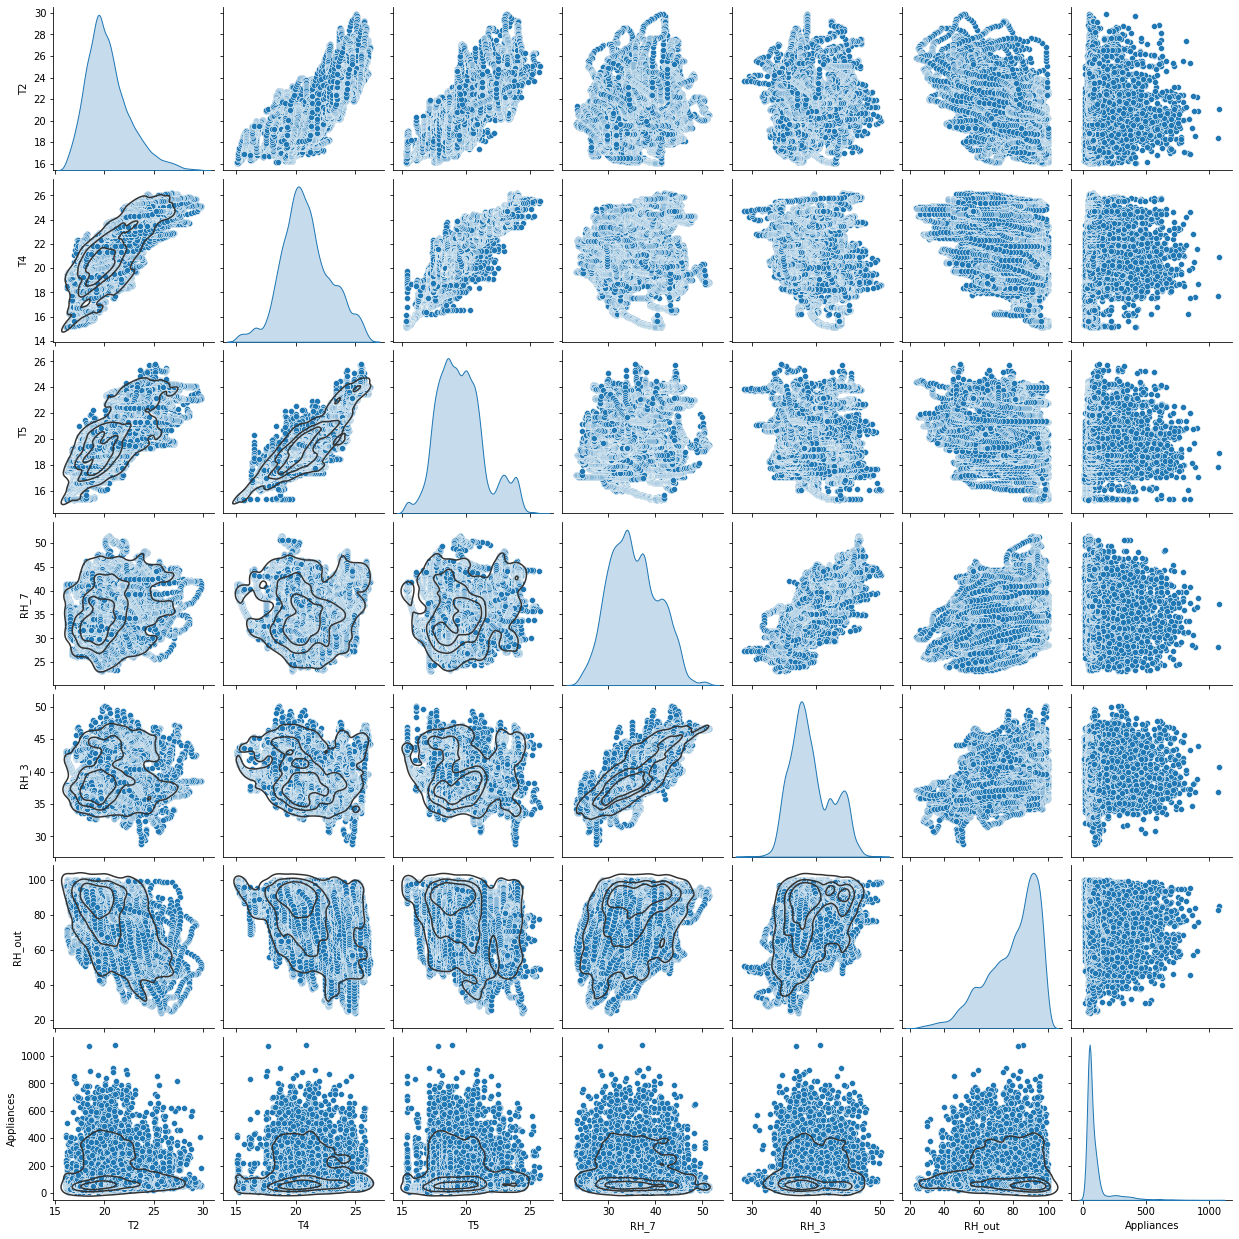

In [130]:
g = sns.pairplot(df_sample_colomn_energydata[df_sample_colomn_energydata.columns[1:]], diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

### 03-02 Mathematical Conditional Expectations and Variances
Conditional mean and variances, where light column is equal to each of its unique values.

In [11]:
#Getting the distinct values of the column : Light, whis is  a descet variable.
column=df_sample_colomn_energydata['lights']
lights= np.unique (column)   #  [ 0 10 20 30 40 50 60 70]

In [224]:
#
conditional_mean=[]
conditional_var=[] 
for light in lights:
    means=df_sample_colomn_energydata[df_sample_colomn_energydata.lights==light].mean()
    conditional_mean.append([mean for mean in means])
    variances=df_sample_colomn_energydata[df_sample_colomn_energydata.lights==light].var(ddof=1)
    conditional_var.append([variance for variance in variances])
print("Conditional mean")
print(tabulate(conditional_mean, headers=[ 'lights','T2', 'T4', 'T5',  'RH_7', 'RH_3', 'RH_out','Appliances'],  tablefmt='fancy_grid',numalign ='center'))
print("Conditional variance")
print(tabulate(conditional_var, headers=[ 'lights','T2', 'T4', 'T5',  'RH_7', 'RH_3', 'RH_out','Appliances'],  tablefmt='fancy_grid',numalign ='center'))

0
10
20
30
40
50
60
70
Conditional mean
╒══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤══════════╤══════════════╕
│  lights  │   T2    │   T4    │   T5    │  RH_7   │  RH_3   │  RH_out  │  Appliances  │
╞══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪══════════╪══════════════╡
│    0     │ 20.3632 │ 20.8968 │ 19.6805 │ 35.3249 │ 39.045  │ 79.2606  │   86.5847    │
├──────────┼─────────┼─────────┼─────────┼─────────┼─────────┼──────────┼──────────────┤
│    10    │ 20.0916 │ 20.3328 │ 19.1825 │ 35.4423 │ 39.6249 │ 80.7906  │   129.037    │
├──────────┼─────────┼─────────┼─────────┼─────────┼─────────┼──────────┼──────────────┤
│    20    │ 20.4986 │ 21.2078 │ 19.5228 │ 35.5511 │ 39.9082 │ 81.3914  │   136.429    │
├──────────┼─────────┼─────────┼─────────┼─────────┼─────────┼──────────┼──────────────┤
│    30    │ 20.3294 │ 20.9572 │ 19.2241 │ 35.8167 │ 40.5394 │ 82.8748  │   150.215    │
├──────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────

## Step 04: pair correlation coefficients, confidence intervals for them and significance levels.

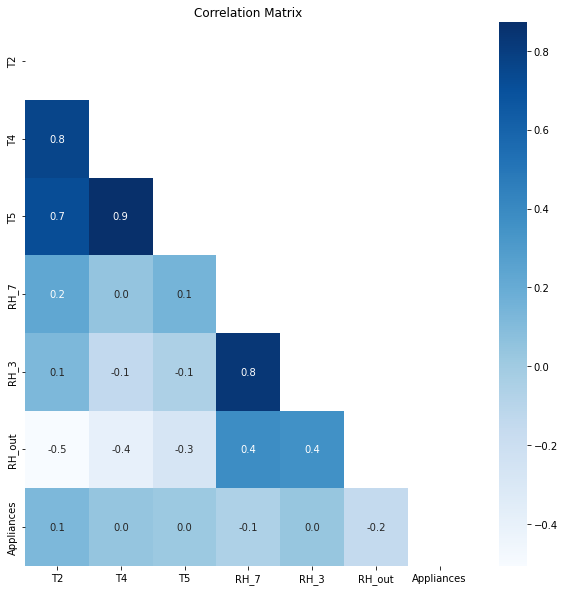

In [138]:
#Pair correlation coefficients, Correlation Matrix
fig, ax = plt.subplots(figsize=(10,10))
corr = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[1:]].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True,  fmt='.1f',ax=ax, cmap = 'Blues')
plt.title('Correlation Matrix')
plt.show()

In [80]:
results=[]
columns_names=df_sample_colomn_energydata.columns[1:]
for col_name in columns_names:
    for col_name_2 in columns_names:
        if(col_name!=col_name_2):
            x=df_sample_colomn_energydata[col_name].apply(lambda x: float(x))
            y=df_sample_colomn_energydata[col_name_2].apply(lambda x: float(x))
            r, p = stats.pearsonr(x,y)
            r_z = np.arctanh(r) # matches Fisher transform
            # Corresponding standard deviation
            se = 1/np.sqrt(x.size-3)
            alpha = 0.05
            z = stats.norm.ppf(1-alpha/2)
            lo_z, hi_z = r_z-z*se, r_z+z*se
            results.append([col_name,col_name_2,r,[lo_z,hi_z],p])

print(tabulate(results, headers=['First Col','Second Col','Correlation coefficient','Confidence interval','P: Significance Level'],  tablefmt='fancy_grid',numalign ='center'))

╒═════════════╤══════════════╤═══════════════════════════╤═══════════════════════════════════════════════╤═════════════════════════╕
│ First Col   │ Second Col   │  Correlation coefficient  │ Confidence interval                           │  P: Significance Level  │
╞═════════════╪══════════════╪═══════════════════════════╪═══════════════════════════════════════════════╪═════════════════════════╡
│ T2          │ RH_8         │         0.0685342         │ [0.054688949867464656, 0.08259462495238039]   │       5.49877e-22       │
├─────────────┼──────────────┼───────────────────────────┼───────────────────────────────────────────────┼─────────────────────────┤
│ T2          │ RH_9         │         0.157346          │ [0.14471162378348612, 0.17261729886840183]    │      1.36362e-109       │
├─────────────┼──────────────┼───────────────────────────┼───────────────────────────────────────────────┼─────────────────────────┤
│ T2          │ T8           │         0.578191          │ [0.6457878

## Step 5: Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).


### Features Selection and Data Partitioning

In [25]:
##### Data with no preprocessing
# feature selection
dataTargetOrg = df_sample_colomn_energydata[['Appliances']]
dataPredOrg = df_sample_colomn_energydata.drop('Appliances',axis=1)
dataPredOrg = df_sample_colomn_energydata.drop('lights',axis=1)
# Data splitting
x_trainOrg, x_testOrg, y_trainOrg, y_testOrg = train_test_split(dataPredOrg, dataTargetOrg, test_size=0.2, random_state=0)

### Data processing and transformation

In [26]:
# 1. Standard Scaler for the splitted data
scaler = StandardScaler()
x_train_scaler = pd.DataFrame(scaler.fit_transform(x_trainOrg))
y_train_scaler = pd.DataFrame(scaler.fit_transform(y_trainOrg))
x_test_scaler = pd.DataFrame(scaler.fit_transform(x_testOrg))
y_test_scaler = pd.DataFrame(scaler.fit_transform(y_testOrg))
##################################
# 2. Polynomial transformation
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_trainOrg)
x_test_poly = poly.fit_transform(x_testOrg)
y_train_poly=poly.fit_transform(y_trainOrg)
y_test_poly=poly.fit_transform(y_testOrg)
dataPredPoly = poly.fit_transform(dataPredOrg)
#######################################
# 3. MinMax Scaler for the original data, deleting outhliers and then spliting it
# Data Normalization 
scaler = MinMaxScaler()
dataTrans = pd.DataFrame(scaler.fit_transform(df_sample_colomn_energydata), columns=df_sample_colomn_energydata.columns)
# Eliminating outliers
Q1=dataTrans.quantile(0.25)
Q3 = dataTrans.quantile(0.75)
IQR = Q3-Q1
dataClean = dataTrans[~((dataTrans < (Q1-IQR * 1.5)) |(dataTrans > (Q3 + IQR*1.5)))]
#Filling the Nan values after eleminating the outliers
imputer = SimpleImputer(strategy='mean')
dataImp = pd.DataFrame(imputer.fit_transform(dataClean), columns=dataClean.columns)
# Splitting the data
# feature selection
dataTargetNormalized = dataImp['Appliances']
dataPredNormalized = dataImp.drop('Appliances',axis=1)
dataPredNormalized = dataImp.drop('lights',axis=1)
# Data splitting
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(dataPredNormalized, dataTargetNormalized, test_size=0.2, random_state=0)

#### Checking Correlation between independent values before and after processing
VIF > 10 --> heighly correlaated

In [11]:
def applyVIF(X):
   vif = pd.DataFrame()
   vif["Features"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   print(vif)
# before preprocessing
print("before preprocessing")
print(applyVIF(df_sample_colomn_energydata.drop('lights',axis=1)))
print("after preprocessing")
print(applyVIF(dataImp.drop('lights',axis=1)))

before preprocessing
     Features         VIF
0          T2  356.357798
1          T4  546.350150
2          T5  518.523212
3        RH_7  140.679689
4        RH_3  298.139409
5      RH_out   53.896743
6  Appliances    2.018485
None
after preprocessing
     Features        VIF
0          T2  14.700707
1          T4  29.610371
2          T5  21.909978
3        RH_7  23.202240
4        RH_3  35.544483
5      RH_out  14.535763
6  Appliances   5.678514
None


## Step 6 : Building model

In [13]:
# Defining Mean Absolute Precentage Error Function
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### 1.Linear Regression 

model parameters:
model weights: [[-1.13348630e-14  2.12052598e-14 -2.77555756e-16 -3.79557497e-15
   6.49480469e-15  0.00000000e+00  1.00000000e+00]]
model bias: [-2.84217094e-13]
MAE: 3.47098416219673e-14
MSE 2.7916218507951496e-27
MAPE 4.3465643914599294e-16
Determination coefficient =  1.0


Text(0, 0.5, 'Appliances')

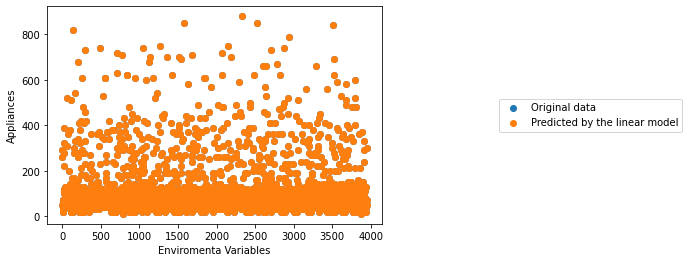

In [59]:
# Original Data
lr = LinearRegression()
lr.fit(x_trainOrg, y_trainOrg)
# predict
y_pred_linear = lr.predict(x_testOrg)
# Parameters
params = np.append(lr.intercept_, lr.coef_)
print('model parameters:')
print('model weights:', lr.coef_)
print('model bias:', lr.intercept_)
# Errors
mae = mean_absolute_error(y_testOrg, y_pred_linear)
mse = mean_squared_error(y_testOrg, y_pred_linear)
mape = mean_absolute_percentage_error(y_testOrg, y_pred_linear)
print('MAE:', mae)
print('MSE',mse)
print('MAPE',mape)
# Coefficient
print('Determination coefficient = ', lr.score(x_testOrg, y_testOrg))
#graph of real and predicted values
x = []
for i in range(len(y_testOrg)):
    x.append(i)
plt.scatter(x, y_testOrg, label = 'Original data')
plt.scatter(x, y_pred_linear, label = 'Predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')


### 2. Forest Regressor

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MAE: 0.02989612363820623
MSE 0.30909551558145426
MAPE 3.926741870717143e-05


Text(0, 0.5, 'Appliances')

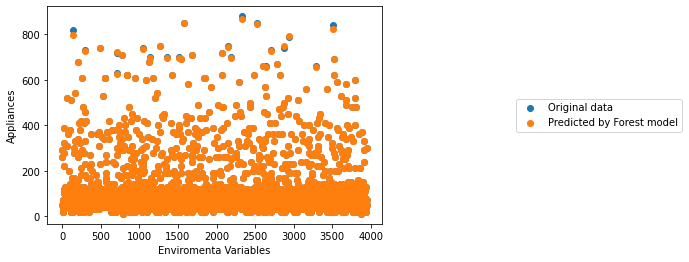

In [60]:
model = RandomForestRegressor(n_estimators=5, criterion='absolute_error')
model.fit(x_trainOrg, y_trainOrg)
y_pred_forest = model.predict(x_testOrg)
mae_RFR = mean_absolute_error(y_testOrg, y_pred_forest)
mse_RFR = mean_squared_error(y_testOrg, y_pred_forest)
mape_RFR = mean_absolute_percentage_error(y_testOrg, y_pred_forest)
print('MAE:', mae_RFR)
print('MSE',mse_RFR)
print('MAPE',mape_RFR)
#graph of real and predicted values
x = []
for i in range(len(y_testOrg)):
    x.append(i)
plt.scatter(x, y_testOrg, label = 'Original data')
plt.scatter(x,y_pred_forest, label = 'Predicted by Forest model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')

### 3.Lasso Regularization

In [172]:
def lassos (alphas,x_train_scaler, y_train_scaler,y_test_scaler):
    results=[]
    pred=[]
    lassos=[]
    i=0
    for alpha in alphas:
        # Create a lasso regression model
        lasso = Lasso(alpha=alpha)
        # Fitting Data
        lasso.fit(x_train_scaler, y_train_scaler)
        # Forecast on a test sample
        y_pred_scaler = np.expand_dims(lasso.predict(x_test_scaler), 1)      
        # Errors
        mae=(mean_absolute_error(y_test_scaler, y_pred_scaler))
        mse=(mean_squared_error(y_test_scaler, y_pred_scaler))
        mape=(mean_absolute_percentage_error(y_test_scaler, y_pred_scaler))
        cofficient=( lasso.score(x_test_scaler, y_test_scaler))
        intercept=(lasso.intercept_)
        coef=(lasso.coef_)
        pred.append(y_pred_scaler)
        results.append([alpha,mae,mse,mape,cofficient,intercept,coef])  
        lassos.append(lasso)      
    return results, pred,lassos

In [173]:
alphas=[0.1 , 0.2 , 0.3, 0.4 ,0.5, 0.6 , 0.7 , 0.8,0.9, 1 , 5 ]
results, pred,lassos_all =  lassos(alphas,x_train_scaler,y_train_scaler,y_test_scaler)
print(tabulate(results, headers=[ 'Alpha','MAE','MSE','MAPE ','Cofficient ','Bias','Weights '],  tablefmt='fancy_grid',numalign ='center'))

╒═════════╤═══════════╤═══════╤═════════╤═══════════════╤═════════════╤══════════════════════════════════════════════════════════════════╕
│  Alpha  │    MAE    │  MSE  │  MAPE   │  Cofficient   │    Bias     │ Weights                                                          │
╞═════════╪═══════════╪═══════╪═════════╪═══════════════╪═════════════╪══════════════════════════════════════════════════════════════════╡
│   0.1   │ 0.0586256 │ 0.01  │   0.1   │     0.99      │ 6.52576e-19 │ [ 0.   0.   0.  -0.   0.  -0.   0.9]                             │
├─────────┼───────────┼───────┼─────────┼───────────────┼─────────────┼──────────────────────────────────────────────────────────────────┤
│   0.2   │ 0.117251  │ 0.04  │   0.2   │     0.96      │ 1.30515e-18 │ [ 0.   0.   0.  -0.   0.  -0.   0.8]                             │
├─────────┼───────────┼───────┼─────────┼───────────────┼─────────────┼──────────────────────────────────────────────────────────────────┤
│   0.3   │ 0.175877  │ 0.0

Text(0.5, 1.0, 'alpha= 0.1')

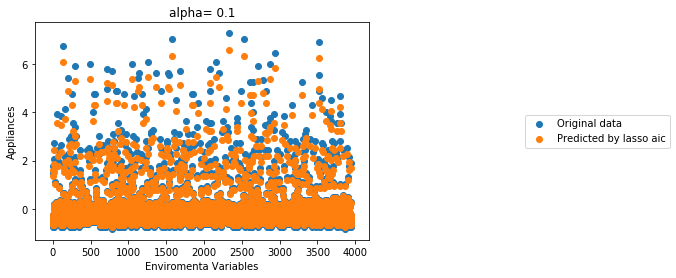

In [156]:
j=0
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'alpha= 0.2')

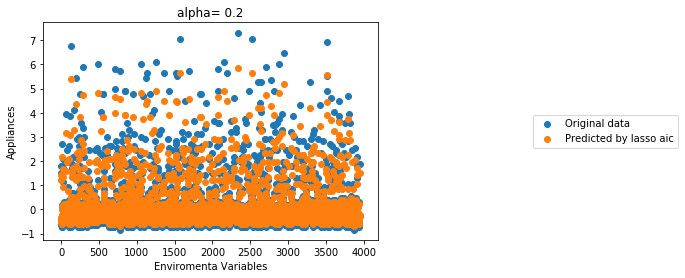

In [157]:
j=1
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'alpha= 0.3')

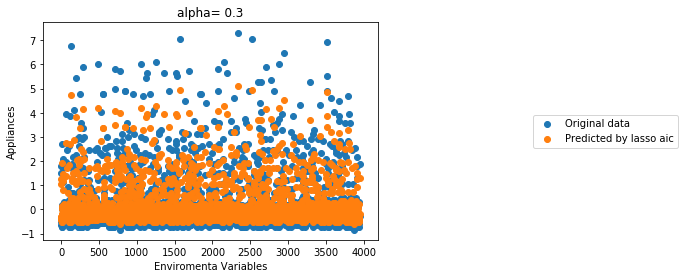

In [158]:
j=2
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'alpha= 0.4')

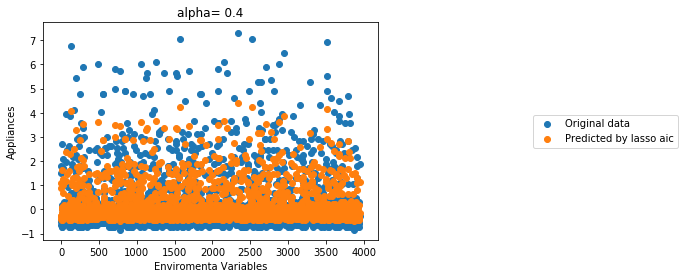

In [159]:
j=3
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'alpha= 0.5')

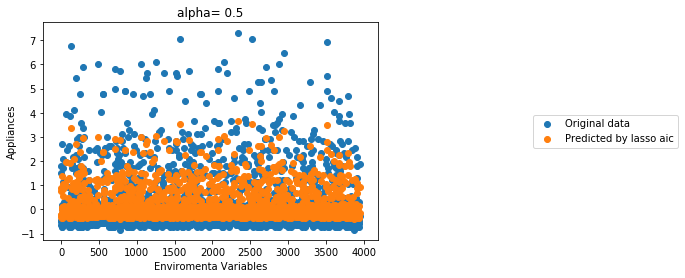

In [160]:
j=4
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'alpha= 0.6')

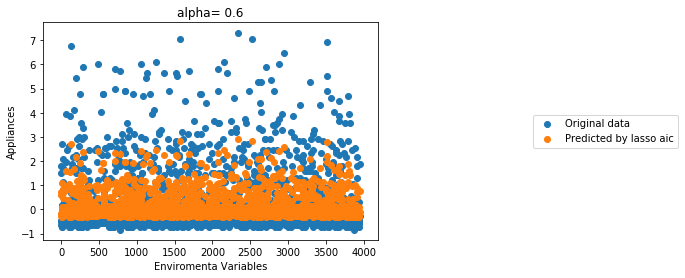

In [161]:
j=5
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'alpha= 0.7')

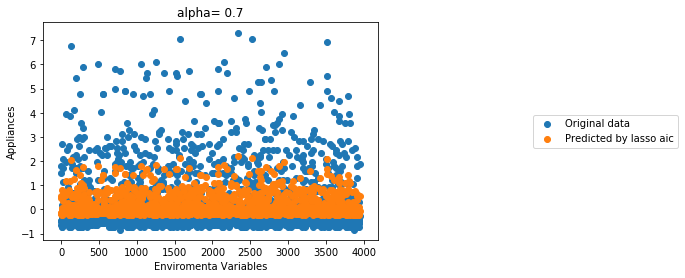

In [162]:
j=6
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'alpha= 0.8')

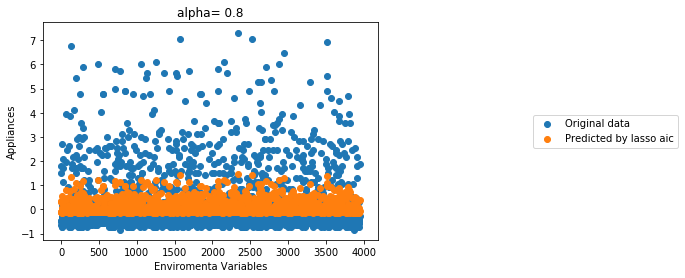

In [163]:
j=7
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'alpha= 0.9')

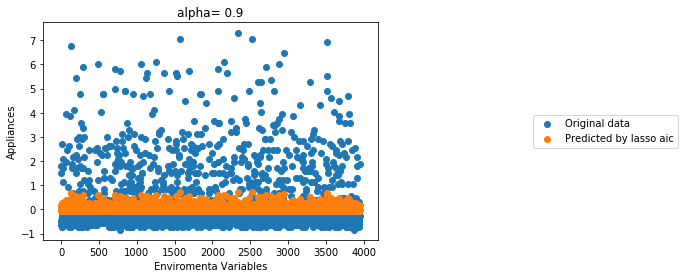

In [164]:
j=8
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'alpha= 1')

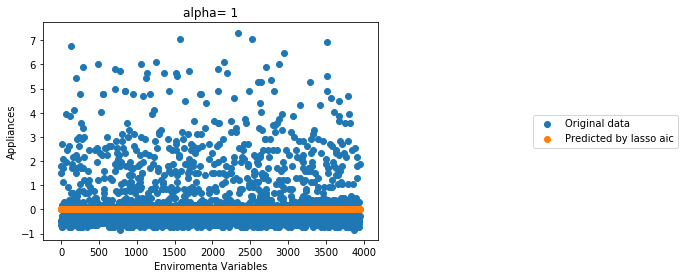

In [165]:
j=9
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'alpha= 5')

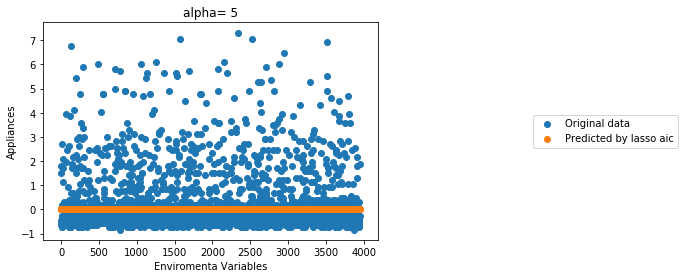

In [166]:
j=10
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('alpha= ' + str(alphas[j]))

### 4.Ridge
This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm

In [210]:
def ridge_method (alphas,x_train_scaler, y_train_scaler,y_test_scaler):
    results=[]
    pred=[]
    ridges=[]
    i=0
    for alpha in alphas:
        # Create a lasso regression model
        ridge = Ridge(alpha)
        # Fitting Data
        ridge.fit(x_train_scaler, y_train_scaler)
        # Forecast on a test sample
        y_pred_scaler = ridge.predict(x_test_scaler)   
        # Errors
        mae=(mean_absolute_error(y_test_scaler, y_pred_scaler))
        mse=(mean_squared_error(y_test_scaler, y_pred_scaler))
        mape=(mean_absolute_percentage_error(y_test_scaler, y_pred_scaler))
        cofficient=( ridge.score(x_test_scaler, y_test_scaler))
        intercept=(ridge.intercept_)
        coef=(ridge.coef_)
        pred.append(y_pred_scaler)
        results.append([alpha,mae,mse,mape,cofficient,intercept,coef])  
        ridges.append(ridge)      
    return results, pred,ridges

In [213]:
alphas=[10 , 500 , 1000, 10000 , 80000, 100000,  200000, 1000000 ]
results_ridg, pred_ridg,ridges_all =  ridge_method(alphas,x_train_scaler,y_train_scaler,y_test_scaler)
print(tabulate(results_ridg, headers=[ 'Alpha','MAE','MSE','MAPE ','Cofficient ','Bias','Weights '],  tablefmt='fancy_grid',numalign ='center'))

╒═════════╤═════════════╤═════════════╤════════════╤═══════════════╤═════════════╤═══════════════════════════════════════════════════════════════════════════╕
│  Alpha  │     MAE     │     MSE     │   MAPE     │  Cofficient   │    Bias     │ Weights                                                                   │
╞═════════╪═════════════╪═════════════╪════════════╪═══════════════╪═════════════╪═══════════════════════════════════════════════════════════════════════════╡
│   10    │ 0.000374683 │ 4.2556e-07  │ 0.00152499 │       1       │ 1.14919e-19 │ [[ 1.12079708e-04 -3.24510483e-05 -1.63107764e-05 -1.91887661e-04         │
│         │             │             │            │               │             │    1.84111839e-04 -5.36752535e-05  9.99329315e-01]]                       │
├─────────┼─────────────┼─────────────┼────────────┼───────────────┼─────────────┼───────────────────────────────────────────────────────────────────────────┤
│   500   │  0.018025   │ 0.000987264 │ 0.0688

Text(0.5, 1.0, 'ridge, alpha= 10')

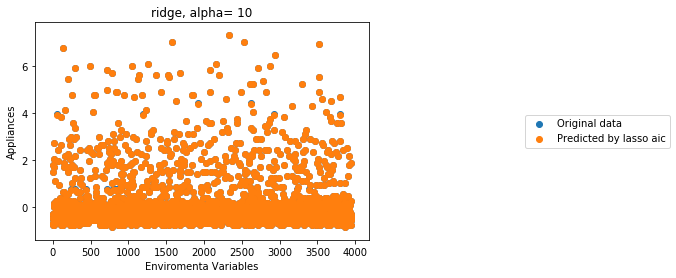

In [214]:
j=0
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred_ridg[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('ridge, alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'ridge, alpha= 500')

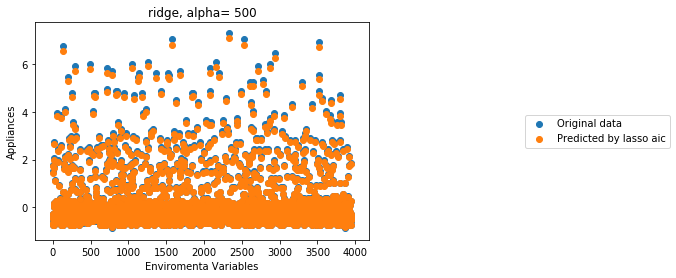

In [215]:
j=1
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred_ridg[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('ridge, alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'ridge, alpha= 1000')

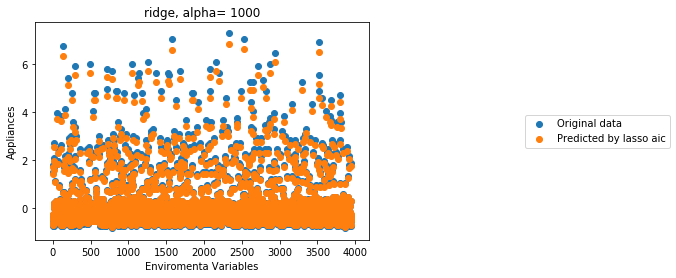

In [216]:
j=2
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred_ridg[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('ridge, alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'ridge, alpha= 10000')

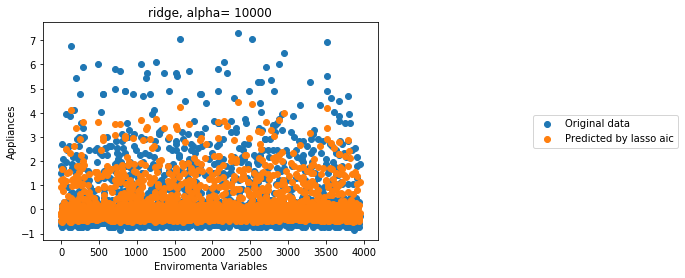

In [217]:
j=3
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred_ridg[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('ridge, alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'ridge, alpha= 80000')

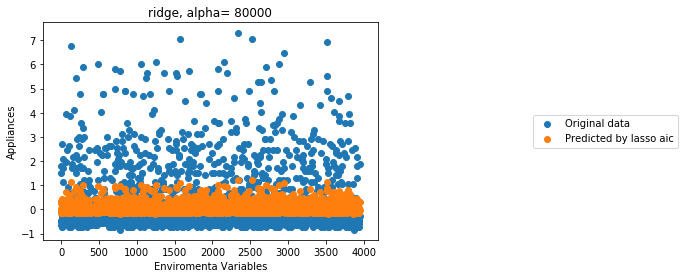

In [218]:
j=4
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred_ridg[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('ridge, alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'ridge, alpha= 100000')

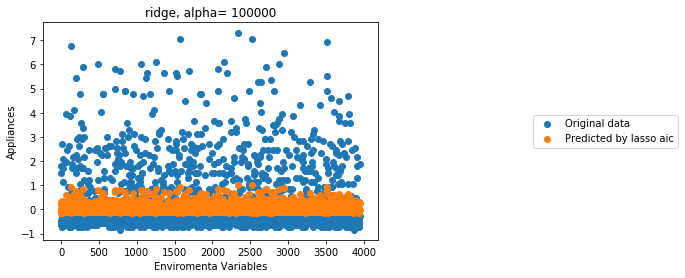

In [219]:
j=5
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred_ridg[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('ridge, alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'ridge, alpha= 200000')

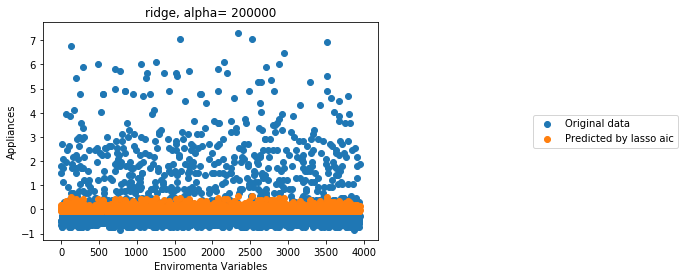

In [220]:
j=6
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred_ridg[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('ridge, alpha= ' + str(alphas[j]))

Text(0.5, 1.0, 'ridge, alpha= 1000000')

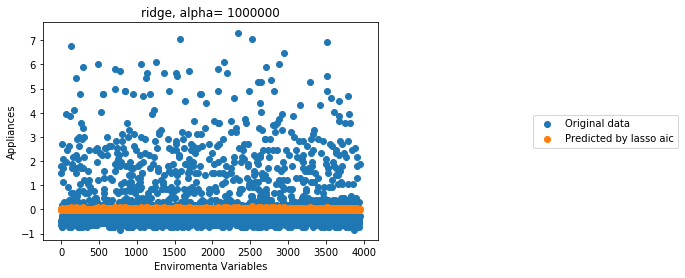

In [221]:
j=7
x = []
for i in range(len(y_test_scaler)):
    x.append(i)
plt.scatter(x, y_test_scaler, label = 'Original data')
plt.scatter(x, pred_ridg[j], label = 'Predicted by lasso aic')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel('Enviromenta Variables')
plt.ylabel('Appliances')
plt.title ('ridge, alpha= ' + str(alphas[j]))

## Step 07 Distribution of Residuals

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


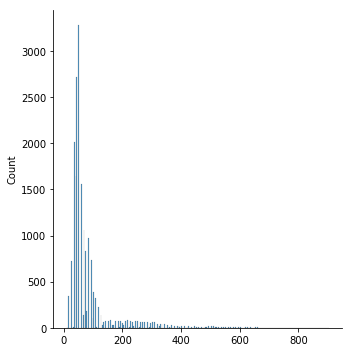

In [222]:
# Ridge Regression
y_pred_all = ridges_all[4].predict(dataPredOrg)
# distribution of residuals
target = np.array(dataTargetOrg)
predicts = np.array(y_pred_all)
diff = target[:,0] - predicts[:,0]
sns.displot(diff)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


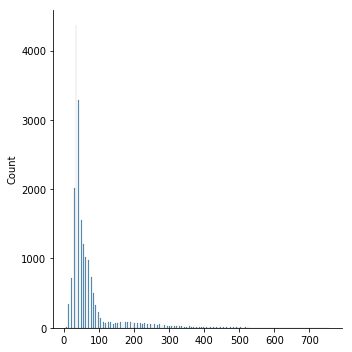

In [176]:
# laisso Regression   alpha lasso = 0.7
y_pred_all = lassos_all[6].predict(dataPredOrg)
# distribution of residuals
target = np.array(dataTargetOrg)
predicts = np.array(y_pred_all)
diff = target[:,0] - predicts
sns.displot(diff)

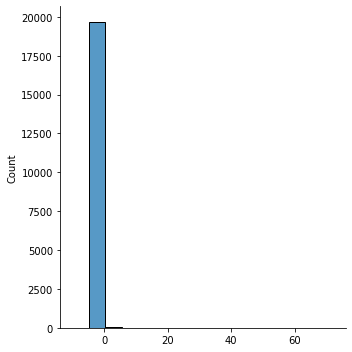

In [54]:
# Forest Regression
y_pred_all = model.predict(dataPredOrg)
# distribution of residuals
target = np.array(dataTargetOrg)
predicts = np.array(y_pred_all)
diff = target[:,0] - predicts
sns.displot(diff)

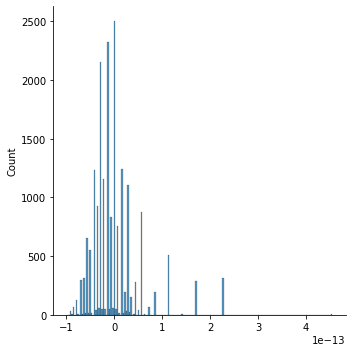

In [55]:
## Linear Regression
y_pred_all = lr.predict(dataPredOrg)
# distribution of residuals
target = np.array(dataTargetOrg)
predicts = np.array(y_pred_all)
diff = target[:,0] - predicts[:,0]
sns.displot(diff)